In [11]:
import numpy as np
from sympy import *
init_printing(use_latex="mathjax")

In [12]:
from sympy import *
theta,E2,E3,t,hbar = symbols("theta E2 E3 t hbar", real=True)

# Nr.4
# (a)
psi = Matrix([1,0])
R = Matrix([[cos(theta), sin(theta)],[-sin(theta), cos(theta)]])
Rinv = R.adjoint()
E = Matrix([[E2,0],[0,E3]])

A = psi.T * R * exp(-I*E*t/hbar) * Rinv * psi
P = conjugate(A) * A
simplify(P[0])

⎛ ⅈ⋅E₂⋅t            ⅈ⋅E₃⋅t        ⎞ ⎛ -ⅈ⋅E₃⋅t             -ⅈ⋅E₂⋅t         ⎞
⎜ ──────            ──────        ⎟ ⎜ ────────            ────────        ⎟
⎜   h̅      2         h̅      2   ⎟ ⎜    h̅       2          h̅       2   ⎟
⎝ℯ      ⋅cos (θ) + ℯ      ⋅sin (θ)⎠⋅⎝ℯ        ⋅sin (θ) + ℯ        ⋅cos (θ)⎠

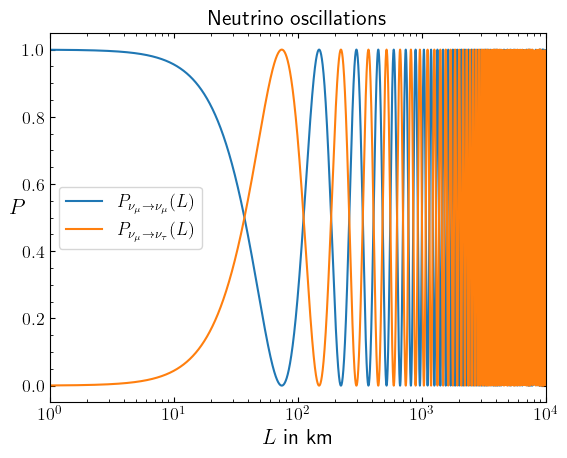

In [21]:
# (b)
import scipy.constants as c
import matplotlib.pyplot as plt 
plt.rcParams.update({"xtick.top": True , "ytick.right": True,
                     "xtick.minor.visible": True, "ytick.minor.visible": True,
                     "xtick.direction": "in" , "ytick.direction": "in",
                     "axes.labelsize": "large", "text.usetex": True, "font.size": 13
                     })

theta = np.pi/4
Delta_m_sq = 0.0025 / c.c**2 * c.e # J
Delta_E = c.c * Delta_m_sq
E = 1e9 # eV
L = np.logspace(0,4,10000) # km
t = L * 1e3 / c.c

P_mu = 1 - np.sin(2*theta)**2 * np.sin(Delta_E / 2 * t / c.hbar)**2
P_tau = 1-P_mu

plt.plot(L, P_mu, label="$P_{\\nu_\\mu \\to \\nu_\\mu}(L)$")
plt.plot(L, P_tau, label="$P_{\\nu_\\mu \\to \\nu_\\tau}(L)$")
plt.xscale("log")
plt.xlim(min(L), max(L))
plt.xlabel("$L$ in km")
plt.ylabel("$P$",rotation=0)
plt.legend()
plt.title("Neutrino oscillations")
plt.savefig("neutrino_oscillations.pdf")

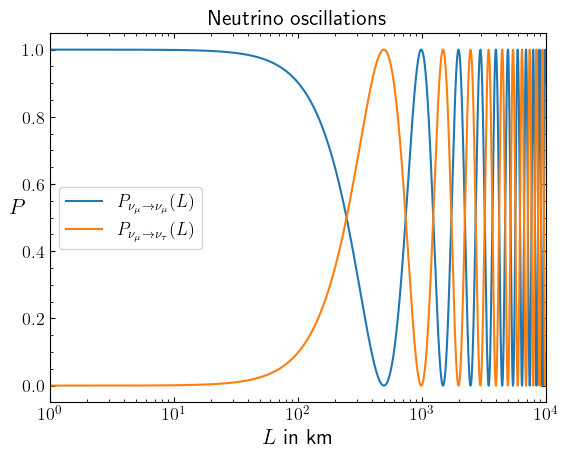

In [38]:
# (b)
import scipy.constants as c
import matplotlib.pyplot as plt 
plt.rcParams.update({"xtick.top": True , "ytick.right": True,
                     "xtick.minor.visible": True, "ytick.minor.visible": True,
                     "xtick.direction": "in" , "ytick.direction": "in",
                     "axes.labelsize": "large", "text.usetex": True, "font.size": 13
                     })

km_to_inv_eV = 1/(197e-12)
theta = np.pi/4
Delta_m_sq = 0.0025 # eV^2
E = 1e9 # eV
L = np.logspace(0,4,10000) # km
L_nat = L * km_to_inv_eV # 1/eV

P_mu = 1 - np.sin(2*theta)**2 * np.sin(Delta_m_sq * L_nat / (4*E))**2
P_tau = 1-P_mu

plt.plot(L, P_mu, label="$P_{\\nu_\\mu \\to \\nu_\\mu}(L)$")
plt.plot(L, P_tau, label="$P_{\\nu_\\mu \\to \\nu_\\tau}(L)$")
plt.xscale("log")
plt.xlim(min(L), max(L))
plt.xlabel("$L$ in km")
plt.ylabel("$P$",rotation=0)
plt.legend()
plt.title("Neutrino oscillations")
plt.savefig("neutrino_oscillations.pdf")